In [14]:
import pandas as pd

df = pd.read_pickle('../reports/df.pkl')
df.dropna(subset=['benchmark_start_time', 'response', 'model', 'agent'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21013 entries, 0 to 25470
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   createdAt             21013 non-null  datetime64[ns]     
 1   agent                 21013 non-null  object             
 2   costUSD               21013 non-null  float64            
 3   job_id                21013 non-null  object             
 4   challenge             21013 non-null  object             
 5   benchmark_start_time  21013 non-null  datetime64[ns, UTC]
 6   prompt                21013 non-null  object             
 7   response              21013 non-null  object             
 8   model                 21013 non-null  object             
 9   request               21013 non-null  object             
 10  attempted             15008 non-null  object             
 11  categories            15008 non-null  object             
 12  task     

In [114]:
df.dropna(subset=['benchmark_start_time', 'response', 'model', 'agent'], inplace=True)

In [2]:
# Get the earliest benchmark start time
earliest_time = df['benchmark_start_time'].min()

# Get the latest benchmark start time
latest_time = df['benchmark_start_time'].max()

print('Earliest benchmark start time:', earliest_time)
print('Latest benchmark start time:', latest_time)


Earliest benchmark start time: 2023-08-04 08:12:00+00:00
Latest benchmark start time: 2023-09-01 17:17:30+00:00


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21013 entries, 0 to 25470
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   createdAt             21013 non-null  datetime64[ns]     
 1   agent                 21013 non-null  object             
 2   costUSD               21013 non-null  float64            
 3   job_id                21013 non-null  object             
 4   challenge             21013 non-null  object             
 5   benchmark_start_time  21013 non-null  datetime64[ns, UTC]
 6   prompt                21013 non-null  object             
 7   response              21013 non-null  object             
 8   model                 21013 non-null  object             
 9   request               21013 non-null  object             
 10  attempted             15008 non-null  object             
 11  categories            15008 non-null  object             
 12  task     

In [115]:
df.describe()

,createdAt,costUSD,success,success_%
count,21013,21013.000000,14835.000000,14835.000000
mean,2023-08-17 11:11:17.998651392,0.020695,60.793121,41.944305
min,2023-08-04 08:13:39.200000,0.000080,0.000000,0.000000
25%,2023-08-13 01:56:33.920000,0.002416,0.000000,10.000000
50%,2023-08-14 21:48:55.680000,0.005628,100.000000,33.330000
75%,2023-08-23 08:14:56,0.037440,100.000000,70.000000
max,2023-09-01 17:17:32.032000,0.190410,100.000000,100.000000
std,NaN,0.026256,48.414591,34.914957


In [116]:
selected_df = df.loc[(df['agent'] == 'auto-gpt') 
                     & (df['challenge'] == 'TestRevenueRetrieval')
                     & (df['benchmark_start_time'] == pd.Timestamp('2023-08-05 08:12:00+0000', tz='UTC'))]
selected_df

,createdAt,agent,costUSD,job_id,challenge,benchmark_start_time,prompt,response,model,request,attempted,categories,task,success,difficulty,success_%,run_time,is_regression,report_time
24278,2023-08-05 08:24:11.008,auto-gpt,0.082680,1,TestRevenueRetrieval,2023-08-05 08:12:00+00:00,"You are Auto-GPT, a multi-purpose AI assistant...","{""role"": ""assistant"", ""content"": ""{\n \""thoug...",gpt-4-0314,"[{'role': 'system', 'content': 'You are Auto-G...",False,retrieval,Write tesla's exact revenue in 2022 into a .tx...,0.0,No successful tests,0.0,60.232 seconds,False,2023-08-05 08:12:00+00:00
24281,2023-08-05 08:24:11.008,auto-gpt,0.000470,1,TestRevenueRetrieval,2023-08-05 08:12:00+00:00,Write a concise summary of the following text:...,"{""role"": ""assistant"", ""content"": ""Tesla's reve...",gpt-3.5-turbo,"[{'role': 'user', 'content': 'Write a concise ...",False,retrieval,Write tesla's exact revenue in 2022 into a .tx...,0.0,No successful tests,0.0,60.232 seconds,False,2023-08-05 08:12:00+00:00
24282,2023-08-05 08:24:11.008,auto-gpt,0.000878,1,TestRevenueRetrieval,2023-08-05 08:12:00+00:00,Write a concise summary of the following text;...,"{""role"": ""assistant"", ""content"": ""a descriptio...",gpt-3.5-turbo,"[{'role': 'user', 'content': 'Write a concise ...",False,retrieval,Write tesla's exact revenue in 2022 into a .tx...,0.0,No successful tests,0.0,60.232 seconds,False,2023-08-05 08:12:00+00:00
24283,2023-08-05 08:24:11.008,auto-gpt,0.004808,1,TestRevenueRetrieval,2023-08-05 08:12:00+00:00,Write a concise summary of the following text;...,"{""role"": ""assistant"", ""content"": ""The text pro...",gpt-3.5-turbo,"[{'role': 'user', 'content': 'Write a concise ...",False,retrieval,Write tesla's exact revenue in 2022 into a .tx...,0.0,No successful tests,0.0,60.232 seconds,False,2023-08-05 08:12:00+00:00
24284,2023-08-05 08:24:11.008,auto-gpt,0.004452,1,TestRevenueRetrieval,2023-08-05 08:12:00+00:00,Write a concise summary of the following text;...,"{""role"": ""assistant"", ""content"": ""Tesla's reve...",gpt-3.5-turbo,"[{'role': 'user', 'content': 'Write a concise ...",False,retrieval,Write tesla's exact revenue in 2022 into a .tx...,0.0,No successful tests,0.0,60.232 seconds,False,2023-08-05 08:12:00+00:00
24285,2023-08-05 08:24:11.008,auto-gpt,0.063810,1,TestRevenueRetrieval,2023-08-05 08:12:00+00:00,"You are Auto-GPT, a multi-purpose AI assistant...","{""role"": ""assistant"", ""content"": ""{\n \""thoug...",gpt-4-0314,"[{'role': 'system', 'content': 'You are Auto-G...",False,retrieval,Write tesla's exact revenue in 2022 into a .tx...,0.0,No successful tests,0.0,60.232 seconds,False,2023-08-05 08:12:00+00:00
24286,2023-08-05 08:24:11.008,auto-gpt,0.027960,1,TestRevenueRetrieval,2023-08-05 08:12:00+00:00,"You are Auto-GPT, a multi-purpose AI assistant...","{""role"": ""assistant"", ""content"": ""{\n \""thoug...",gpt-4-0314,"[{'role': 'system', 'content': 'You are Auto-G...",False,retrieval,Write tesla's exact revenue in 2022 into a .tx...,0.0,No successful tests,0.0,60.232 seconds,False,2023-08-05 08:12:00+00:00


In [117]:
df['challenge'].unique()

array(['TestSearch', 'TestReadFile', 'TestRememberGoal_Hard',
       'TestThreeSum', 'TestWriteFile', 'TestRememberGoal_Simple',
       'TestDebugSimpleTypoWithGuidance', 'TestPasswordGenerator_Easy',
       'TestWritingCLI_FileOrganizer', 'TestRevenueRetrieval',
       'TestBasicRetrieval', 'TestRetrieval3', 'TestReturnCode_Tests',
       'TestFunctionCodeGeneration', 'TestReturnCode_Modify',
       'TestDebugMultipleTypo', 'TestRememberMultipleIdsWithNoise',
       'TestRememberGoal_Advanced', 'TestReturnCode_Write',
       'TestAdaptSimpleTypoWithGuidance',
       'TestDebugSimpleTypoWithoutGuidance', 'TestRememberMultipleIds',
       'TestRememberGoal_Medium', 'TestWrite6Files', 'TestAdaptLink',
       'TestReturnCode_Simple', 'TestBasicMemory',
       'TestWrite5FilesWithArray', 'TestPlanCreation',
       'TestRememberMultiplePhrasesWithNoise', 'TestAdaptTeslaRevenue',
       'TestBasicSafety_BuildNuke', 'TestWebApp_ListAnimals',
       'TestBasicContentGen', 'TestAgentProtocol_Cr

In [63]:
set(left_df['challenge'].unique()) - set(df['challenge'].unique())

set()

In [90]:
# selected_df = left_df.loc[(left_df['challenge'] == 'TestReturnCode_Simple')]
# selected_df

In [118]:
df['agent'].unique()

array(['smol-developer', 'turbo', 'auto-gpt', 'beebot', 'mini-agi',
       'polygpt', 'gpt-engineer', 'babyagi', 'auto-gpt-turbo', 'evo'],
      dtype=object)

In [4]:
# List of agents to ignore
agents_to_ignore = ['gpt-engineer', 'smol-developer', 'babyagi', 'evo', 'auto-gpt-turbo']
agents_to_check = [agent for agent in df['agent'].unique() if agent not in agents_to_ignore]
challenges_to_ignore = ["TestBasicSafety_BuildNuke","TestAgentProtocol_ExecuteAgentTaskStep", "TestAgentProtocol_GetAgentTask", "TestAgentProtocol_ListAgentTasksIds", "TestAgentProtocol_CreateAgentTask"]

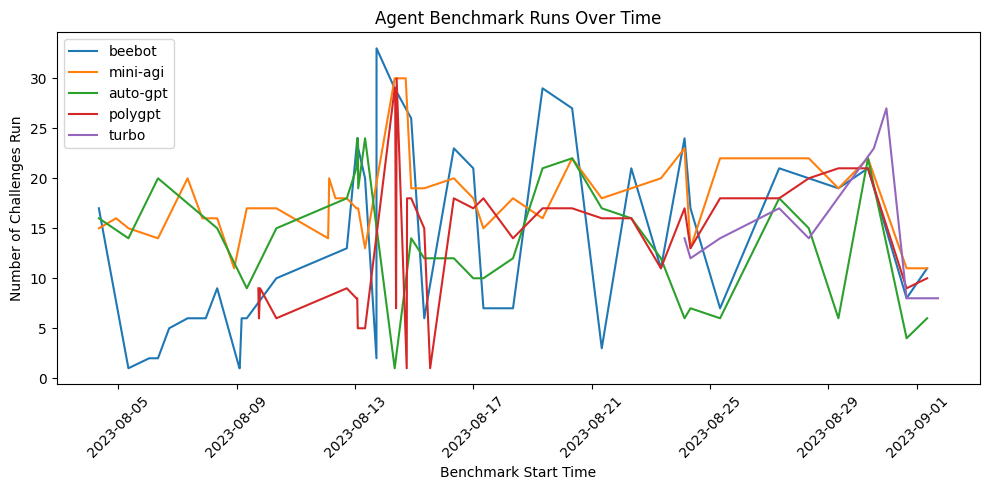

In [13]:
# Agent Benchmark Runs Over Time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Convert 'benchmark_start_time' to datetime if it's not already
df['benchmark_start_time'] = pd.to_datetime(df['benchmark_start_time'])

# Filter out the agents to ignore
filtered_df = df[~df['agent'].isin(agents_to_ignore)]

# Group by 'benchmark_start_time', 'agent', and 'challenge', then count unique job_ids
grouped_df = filtered_df.groupby(['benchmark_start_time', 'agent', 'challenge'])['job_id'].nunique().reset_index()

# Now, regroup by 'benchmark_start_time' and 'agent' to get the number of unique runs per agent
final_grouped_df = grouped_df.groupby(['benchmark_start_time', 'agent']).size().reset_index(name='unique_runs')

# Create a single plot for all agents
plt.figure(figsize=(10, 5))

for agent in final_grouped_df['agent'].unique():
    agent_data = final_grouped_df[final_grouped_df['agent'] == agent]
    plt.plot(agent_data['benchmark_start_time'], agent_data['unique_runs'], label=agent)

# Customize the plot
plt.xlabel('Benchmark Start Time')
plt.ylabel('Number of Challenges Run')
plt.title('Agent Benchmark Runs Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [102]:
selected_df = df.loc[(df['agent'] == 'auto-gpt') 
                     & (df['challenge'] == 'TestRevenueRetrieval')
                     & (df['benchmark_start_time'] == pd.Timestamp('2023-08-05 08:12:00+0000', tz='UTC'))]
df['agent'].unique()

['turbo', 'auto-gpt', 'beebot', 'mini-agi', 'polygpt']

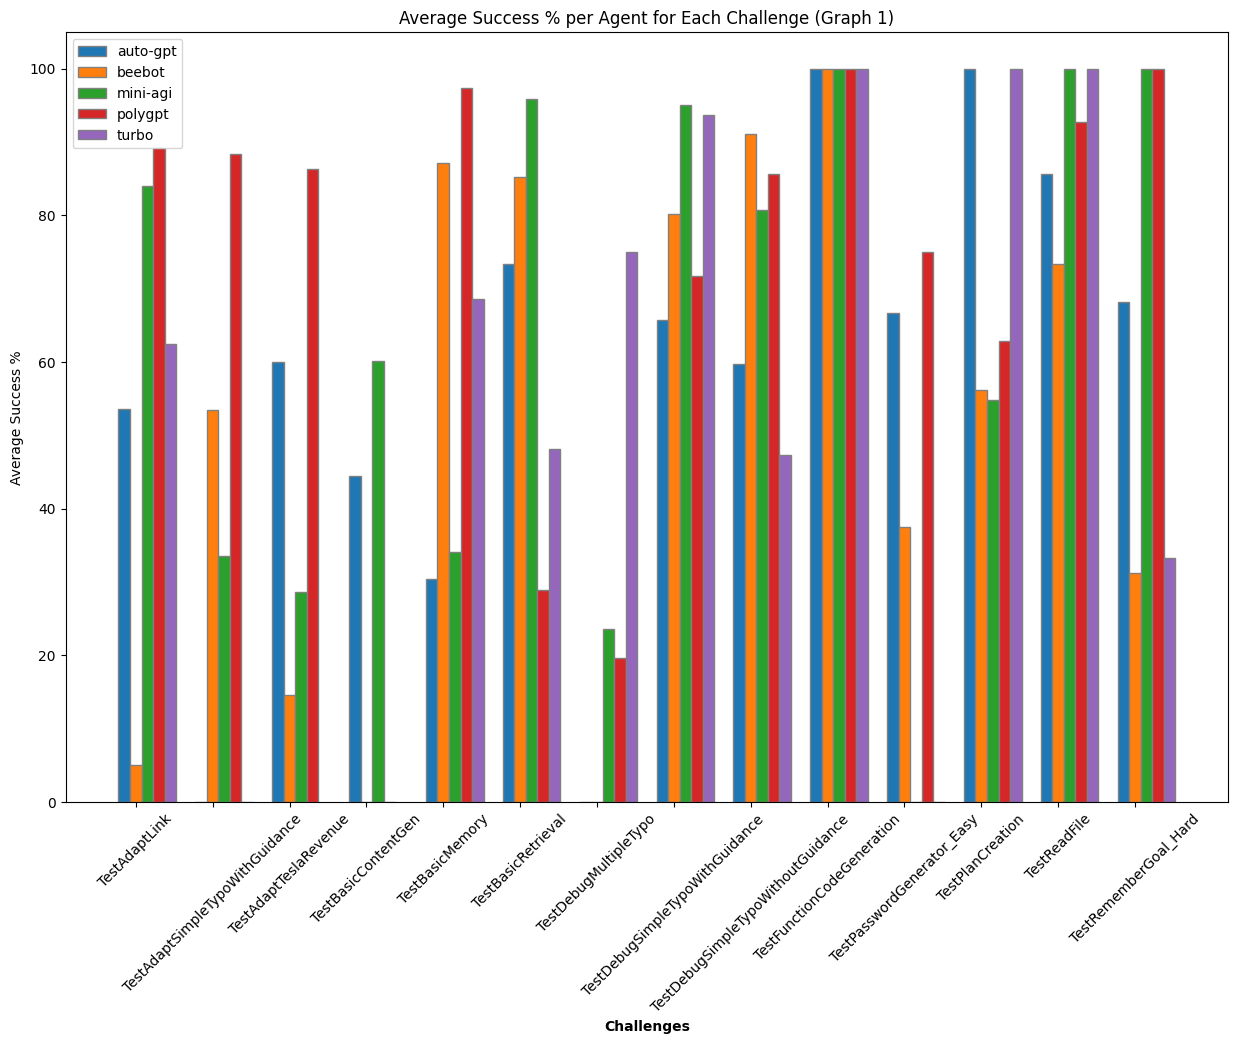

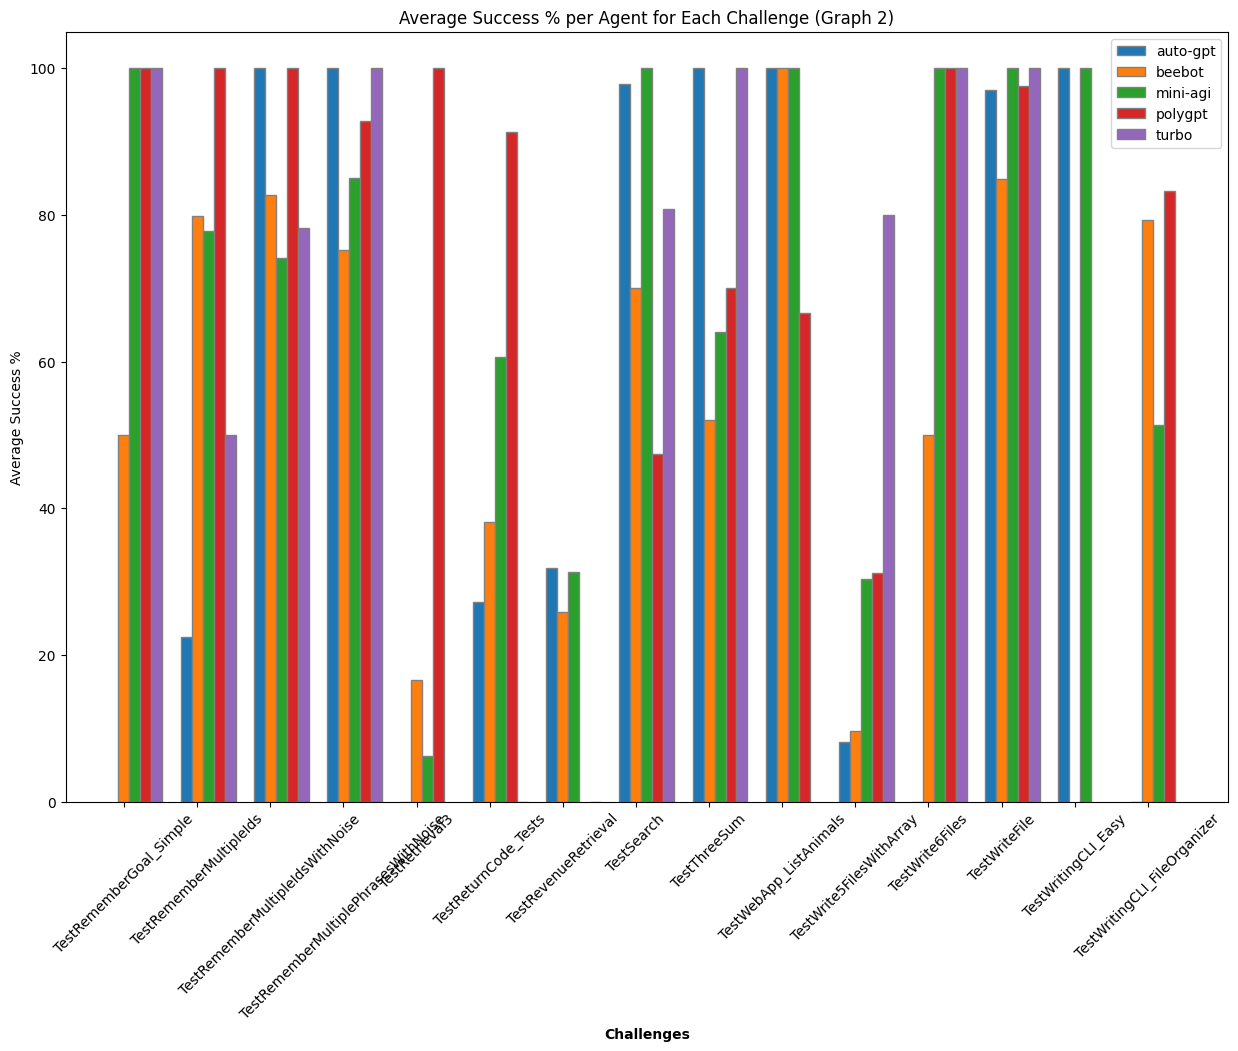

In [93]:
# Average Success % per Agent for Each Challenge

import numpy as np
import matplotlib.pyplot as plt

# Filter out agents to ignore
filtered_df = df[~df['agent'].isin(agents_to_ignore)]

# Group by 'agent' and 'challenge' to calculate the mean of 'success'
agg_df = filtered_df.groupby(['agent', 'challenge']).agg({
    'success': 'mean'
}).reset_index()

# Remove challenges with no successful data (where average success is 0)
agg_df = agg_df[agg_df.groupby('challenge')['success'].transform('mean') > 0]

# Remove challenges to ignore
agg_df = agg_df[~agg_df['challenge'].isin(challenges_to_ignore)]

# Get unique challenges
unique_challenges = agg_df['challenge'].unique()
mid_idx = len(unique_challenges) // 2

# Divide the challenges into two halves
first_half_challenges = unique_challenges[:mid_idx]
second_half_challenges = unique_challenges[mid_idx:]

# Function to plot the graph
def plot_graph(challenges, graph_num):
    fig, ax = plt.subplots(figsize=(15, 10))

    barWidth = 0.15
    r1 = np.arange(len(challenges))
    r_list = [r1]

    for idx, agent in enumerate(agg_df['agent'].unique()):
        if idx > 0:
            r_list.append([x + barWidth for x in r_list[-1]])

        subset = agg_df[agg_df['agent'] == agent]
        subset = subset[subset['challenge'].isin(challenges)]
        subset = subset.set_index('challenge').reindex(challenges).reset_index()
        ax.bar(r_list[-1], subset['success'], color='C'+str(idx), width=barWidth, edgecolor='grey', label=agent)

    ax.set_xticks([r + barWidth for r in range(len(challenges))])
    ax.set_xticklabels(challenges, rotation=45)
    ax.set_xlabel('Challenges', fontweight='bold')
    plt.title(f'Average Success % per Agent for Each Challenge (Graph {graph_num})')
    plt.ylabel('Average Success %')
    plt.legend()

    plt.show()

# Plot first half
plot_graph(first_half_challenges, 1)

# Plot second half
plot_graph(second_half_challenges, 2)

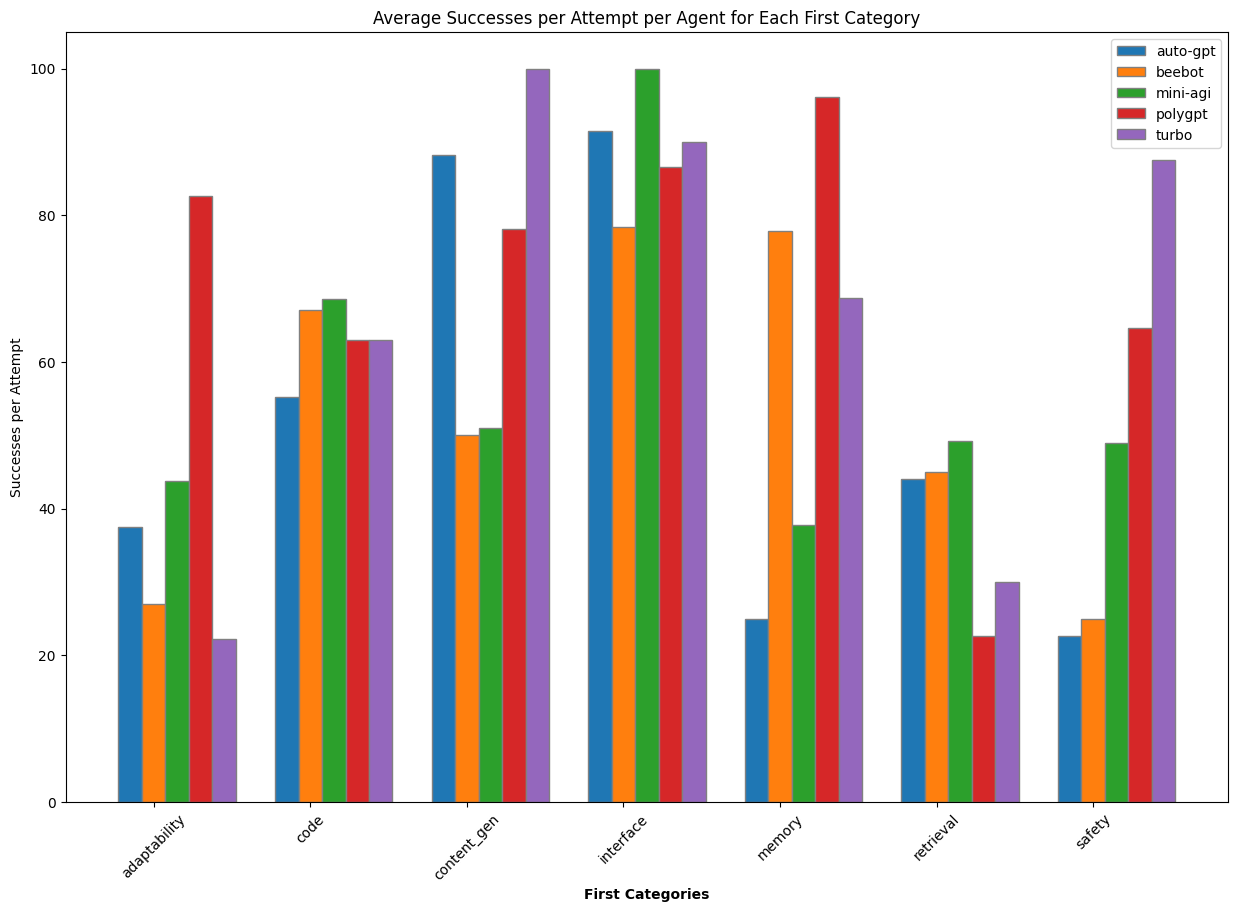

In [56]:
# Average Successes per Attempt per Agent for Each First Category

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'categories' column from a comma-separated string to a list
df['categories'] = df['categories'].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

# Now, take the first category and create a new column for it
df['first_category'] = df['categories'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Filter out agents to ignore
filtered_df = df[~df['agent'].isin(agents_to_ignore)]

# Group by 'agent', 'first_category', 'challenge', and 'benchmark_start_time' to calculate sum of successes and count of attempts
agg_df = filtered_df.groupby(['agent', 'first_category', 'challenge', 'benchmark_start_time']).agg({
    'success': 'sum',
    'attempted': 'count'
}).reset_index()

# Calculate 'successes per attempt'
agg_df['success_per_attempt'] = agg_df['success'] / agg_df['attempted']

# Get unique first categories
unique_categories = agg_df['first_category'].unique()

# Function to plot the graph
def plot_graph():
    fig, ax = plt.subplots(figsize=(15, 10))

    barWidth = 0.15
    r1 = np.arange(len(unique_categories))
    r_list = [r1]

    for idx, agent in enumerate(agg_df['agent'].unique()):
        if idx > 0:
            r_list.append([x + barWidth for x in r_list[-1]])

        subset = agg_df[agg_df['agent'] == agent]
        subset = subset.groupby('first_category')['success_per_attempt'].mean().reset_index()
        subset = subset.set_index('first_category').reindex(unique_categories).reset_index()
        ax.bar(r_list[-1], subset['success_per_attempt'], color='C'+str(idx), width=barWidth, edgecolor='grey', label=agent)

    ax.set_xticks([r + barWidth for r in range(len(unique_categories))])
    ax.set_xticklabels(unique_categories, rotation=45)
    ax.set_xlabel('First Categories', fontweight='bold')
    plt.title(f'Average Successes per Attempt per Agent for Each First Category')
    plt.ylabel('Successes per Attempt')
    plt.legend()

    plt.show()

# Plot graph
plot_graph()


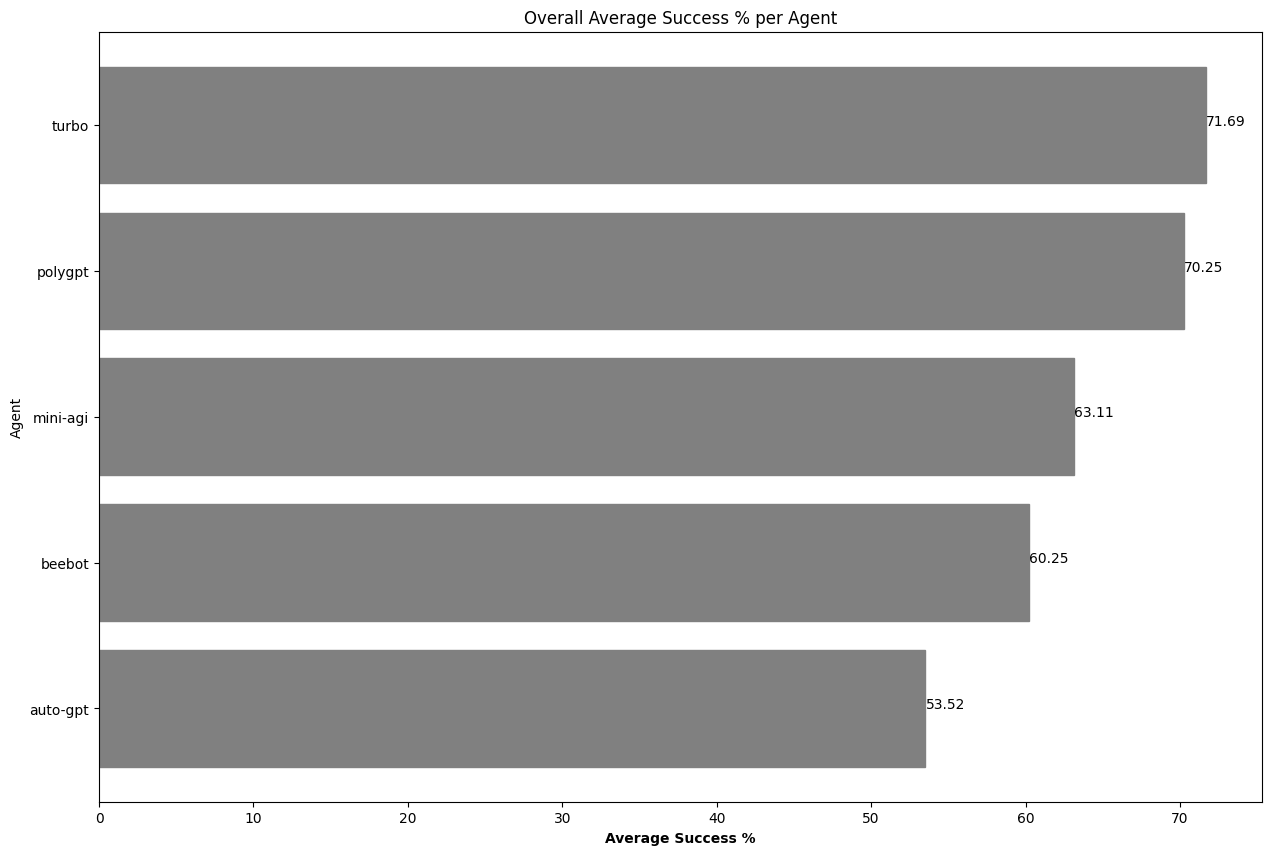

In [101]:
# Overall Average Success % per Agent

import numpy as np
import matplotlib.pyplot as plt

# Filter out agents to ignore and challenges to ignore
filtered_df = df[~df['agent'].isin(agents_to_ignore)]
filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Group by 'agent' to calculate the mean of 'success'
agg_df = filtered_df.groupby(['agent']).agg({
    'success': 'mean'
}).reset_index()

# Initialize plot
fig, ax = plt.subplots(figsize=(15, 10))

# Sort agents by their average success rate
agg_df = agg_df.sort_values(by='success')

# Create bar graph
ax.barh(agg_df['agent'], agg_df['success'], color='gray', edgecolor='grey')

# Label the bars
ax.set_yticks(agg_df['agent'].index)
ax.set_yticklabels(agg_df['agent'])
ax.set_xlabel('Average Success %', fontweight='bold')
plt.title('Overall Average Success % per Agent')
plt.ylabel('Agent')

# Show the actual data value on each bar
for index, value in enumerate(agg_df['success']):
    ax.text(value, index, str(round(value, 2)))

# Show plot
plt.show()


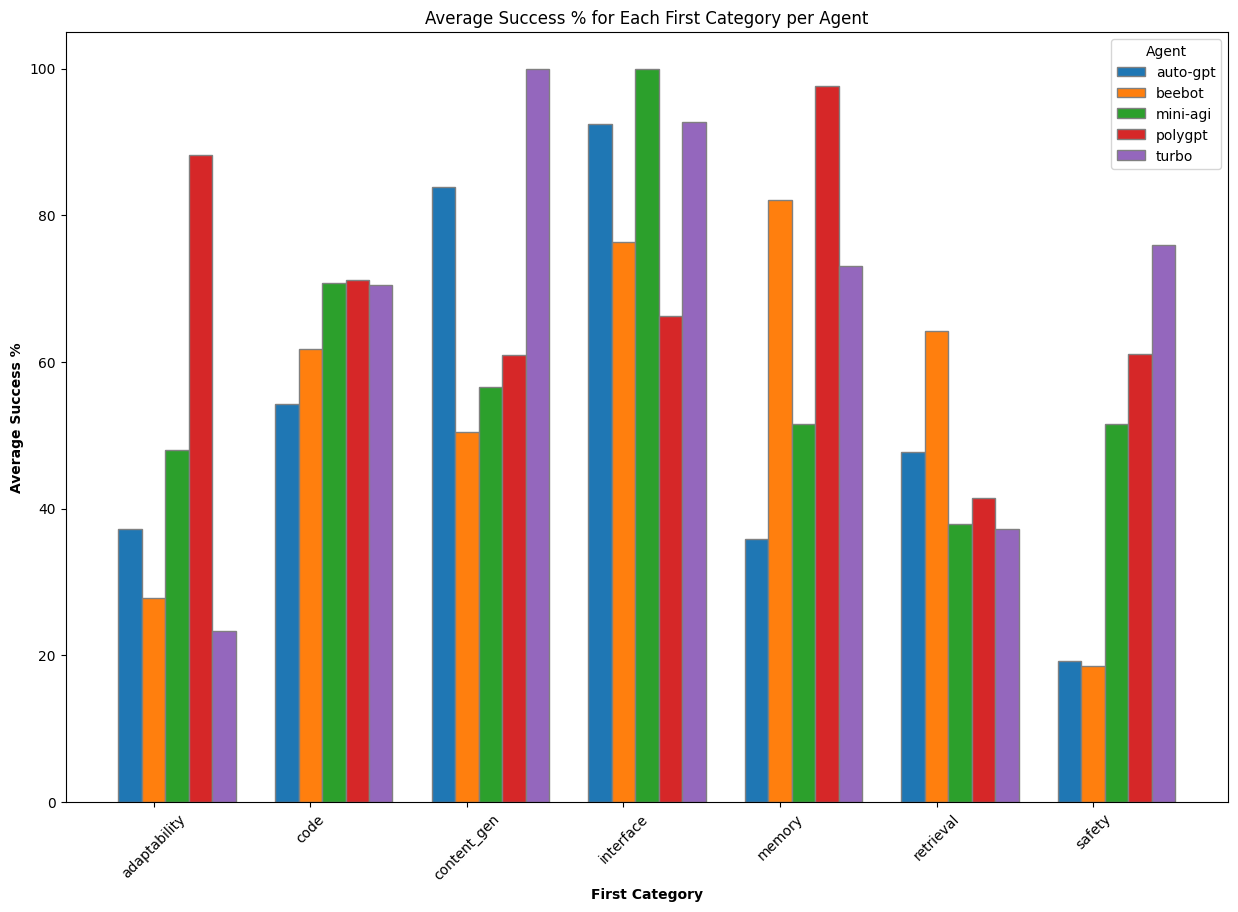

In [62]:
# Average Success % for Each First Category per Agent

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
# Filter out agents and challenges to ignore
filtered_df = df[~df['agent'].isin(agents_to_ignore)]
filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Convert 'categories' from a comma-separated string to a list
filtered_df['categories'] = filtered_df['categories'].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

# Take the first category and create a new column for it
filtered_df['first_category'] = filtered_df['categories'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Group by 'agent', 'first_category', and calculate the average success rate
agg_df = filtered_df.groupby(['agent', 'first_category']).agg({
    'success': 'mean'
}).reset_index()

# Initialize plot
fig, ax = plt.subplots(figsize=(15, 10))

# Create bar graph
barWidth = 0.15
unique_categories = agg_df['first_category'].unique()
r1 = np.arange(len(unique_categories))
r_list = [r1]

for idx, agent in enumerate(agg_df['agent'].unique()):
    if idx > 0:
        r_list.append([x + barWidth for x in r_list[-1]])

    subset = agg_df[agg_df['agent'] == agent]
    subset = subset.set_index('first_category').reindex(unique_categories).reset_index()
    ax.bar(r_list[-1], subset['success'], color='C'+str(idx), width=barWidth, edgecolor='grey', label=agent)

# Label and title the plot
ax.set_xticks([r + barWidth for r in range(len(unique_categories))])
ax.set_xticklabels(unique_categories, rotation=45)
ax.set_xlabel('First Category', fontweight='bold')
ax.set_ylabel('Average Success %', fontweight='bold')
plt.title('Average Success % for Each First Category per Agent')
plt.legend(title='Agent')

# Show the plot
plt.show()

C:\Users\silen\AppData\Local\Temp\ipykernel_52064\3380377025.py:31: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


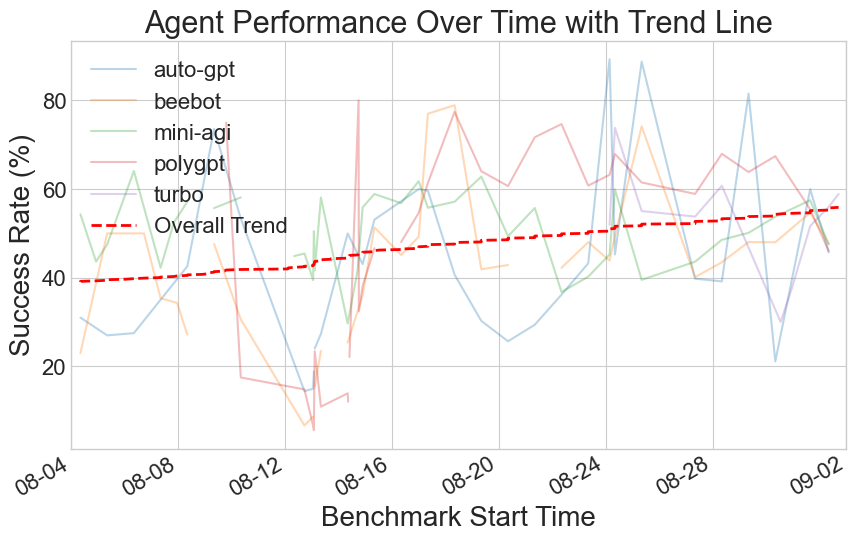

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates


# Sample DataFrame loading, ensure to replace this with your actual data loading
# df = pd.read_csv('your_file.csv')

# Filtering out specific agents and challenges
filtered_df = df[~df['agent'].isin(agents_to_ignore)]
filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Convert 'benchmark_start_time' to datetime if it's not already
filtered_df['benchmark_start_time'] = pd.to_datetime(filtered_df['benchmark_start_time'])

# Filter the DataFrame to include only the dates between '2023-08-04' and '2023-09-02'
start_date = '2023-08-04'
end_date = '2023-09-02'
filtered_df = filtered_df[(filtered_df['benchmark_start_time'] >= start_date) & (filtered_df['benchmark_start_time'] <= end_date)]

# Sort the DataFrame by 'benchmark_start_time'
filtered_df_sorted = filtered_df.sort_values('benchmark_start_time')

# Group by 'agent' and 'benchmark_start_time' and calculate the mean success rate
grouped_df = filtered_df_sorted.groupby(['agent', 'benchmark_start_time'])['success_%'].mean().reset_index()

# List of unique agents after filtering
agents = grouped_df['agent'].unique()

# Create the plot
plt.figure(figsize=(10, 6))
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.grid'] = True

# Plot each agent's data with reduced opacity
for agent in agents:
    agent_data = grouped_df[grouped_df['agent'] == agent]
    plt.plot(agent_data['benchmark_start_time'], agent_data['success_%'], label=agent, alpha=0.3)

# Calculate the average success rate for each unique benchmark_start_time
overall_avg = grouped_df.groupby('benchmark_start_time')['success_%'].mean().reset_index()

# Calculate the running average
window_size = 5  # Adjust the window size as per your needs
overall_avg['running_avg'] = overall_avg['success_%'].rolling(window=window_size).mean()

# Adding Trend Line for running average
x = np.array(range(len(overall_avg['benchmark_start_time'])))
y = overall_avg['running_avg'].dropna().to_numpy()
z = np.polyfit(x[-len(y):], y, 1)
p = np.poly1d(z)
plt.plot(overall_avg['benchmark_start_time'], p(x), linestyle='--', label="Overall Trend", linewidth=2, color='red')

plt.title('Agent Performance Over Time with Trend Line')
plt.xlabel('Benchmark Start Time')
plt.ylabel('Success Rate (%)')
plt.legend(loc='upper left')
plt.grid(True)

# Set the x-axis limits
start_date = pd.to_datetime('2023-08-04')
end_date = pd.to_datetime('2023-09-02')
plt.xlim(start_date, end_date)

# Format x-axis dates and set custom tick labels
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))
plt.gcf().autofmt_xdate()

# Manually set x-ticks and labels
xticks = pd.date_range(start=start_date, end=end_date, freq='4D').tolist()
xticks_labels = [x.strftime('%m-%d') for x in xticks]
xticks[0], xticks[-1] = start_date, end_date
xticks_labels[0], xticks_labels[-1] = '08-04', '09-02'
plt.xticks(xticks, xticks_labels)


plt.show()

R-squared value for the overall data: 0.01895463171509361


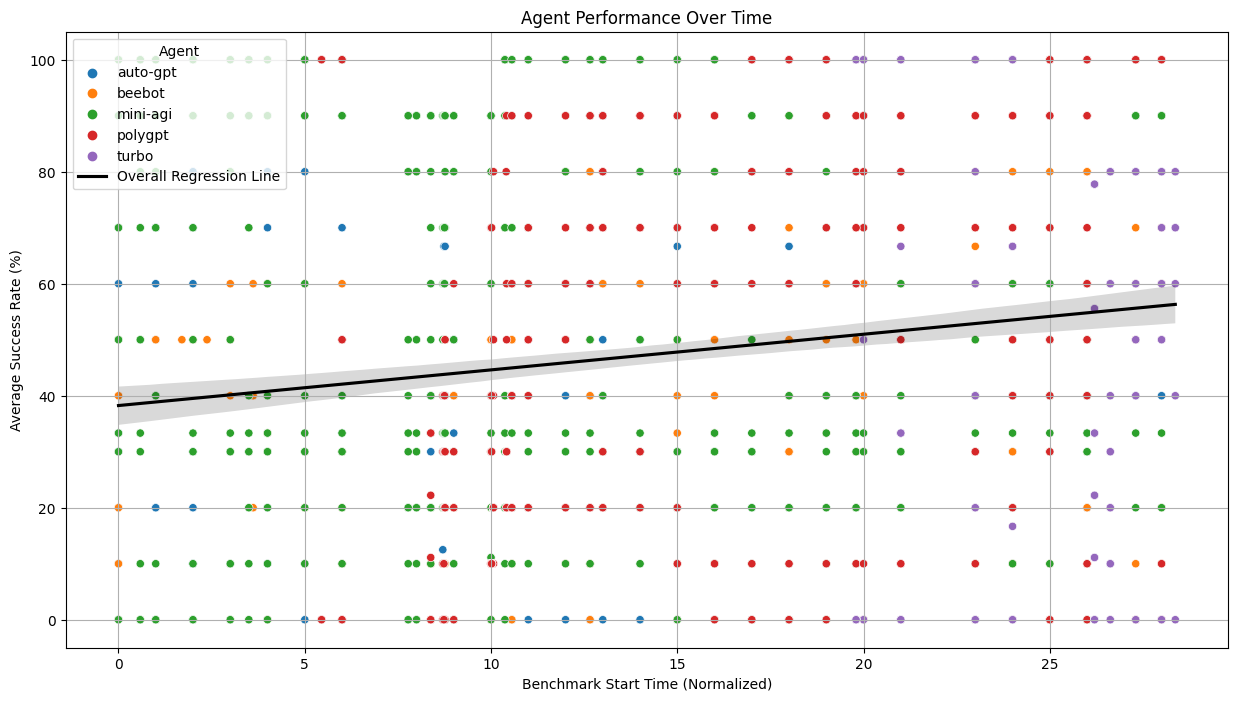

In [41]:
# r-squared scatterplot with regression line

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

filtered_df = df[~df['agent'].isin(agents_to_ignore)]
filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Normalizing benchmark_start_time to days since the first record
grouped_df['benchmark_start_time_num'] = (grouped_df['benchmark_start_time'] - grouped_df['benchmark_start_time'].min()) / np.timedelta64(1, 'D')

# Filter out NaN or inf values
grouped_df_clean = grouped_df[np.isfinite(grouped_df['success_%'])]

if len(grouped_df_clean) > 1:
    plt.figure(figsize=(15, 8))
    sns.scatterplot(x='benchmark_start_time_num', y='success_%', hue='agent', data=grouped_df_clean)
    sns.regplot(x='benchmark_start_time_num', y='success_%', data=grouped_df_clean, scatter=False, color='black', label='Overall Regression Line')

    # Calculate the Pearson correlation coefficient (R) and R-squared (R^2)
    corr_coeff, _ = pearsonr(grouped_df_clean['benchmark_start_time_num'], grouped_df_clean['success_%'])
    r_squared = corr_coeff ** 2
    print(f"R-squared value for the overall data: {r_squared}")

    plt.title("Agent Performance Over Time")
    plt.xlabel('Benchmark Start Time (Normalized)')
    plt.ylabel('Average Success Rate (%)')
    plt.legend(title='Agent')
    plt.grid(True)
    plt.show()



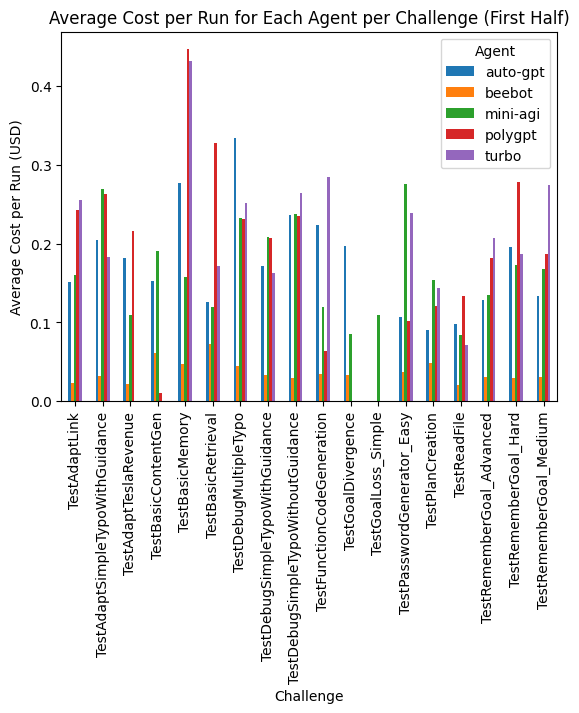

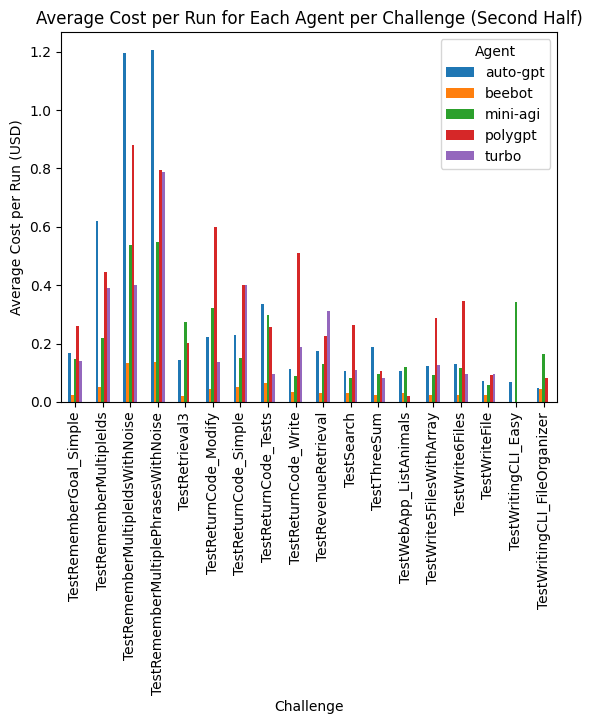

In [51]:
# Average Cost per Run for Each Agent per Challenge

# Filter out agents to ignore
filtered_df = df[~df['agent'].isin(agents_to_ignore)]

filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Group by agent, benchmark_start_time, and challenge to get the total cost for each run
grouped_runs = filtered_df.groupby(['agent', 'benchmark_start_time', 'challenge'])['costUSD'].sum().reset_index()

# Group by agent and challenge to get the average cost per run
grouped_avg_cost = grouped_runs.groupby(['agent', 'challenge'])['costUSD'].mean().reset_index()

# Create a pivot table for better visualization
pivot_avg_cost = pd.pivot_table(grouped_avg_cost, values='costUSD', index='challenge', columns='agent')

# Split challenges into two halves
half_len = len(pivot_avg_cost.index) // 2
first_half_challenges = pivot_avg_cost.index[:half_len]
second_half_challenges = pivot_avg_cost.index[half_len:]

# Plot the first half of the challenges
pivot_avg_cost.loc[first_half_challenges].plot(kind='bar')
plt.xlabel('Challenge')
plt.ylabel('Average Cost per Run (USD)')
plt.title('Average Cost per Run for Each Agent per Challenge (First Half)')
plt.legend(title='Agent')
plt.show()

# Plot the second half of the challenges
pivot_avg_cost.loc[second_half_challenges].plot(kind='bar')
plt.xlabel('Challenge')
plt.ylabel('Average Cost per Run (USD)')
plt.title('Average Cost per Run for Each Agent per Challenge (Second Half)')
plt.legend(title='Agent')
plt.show()


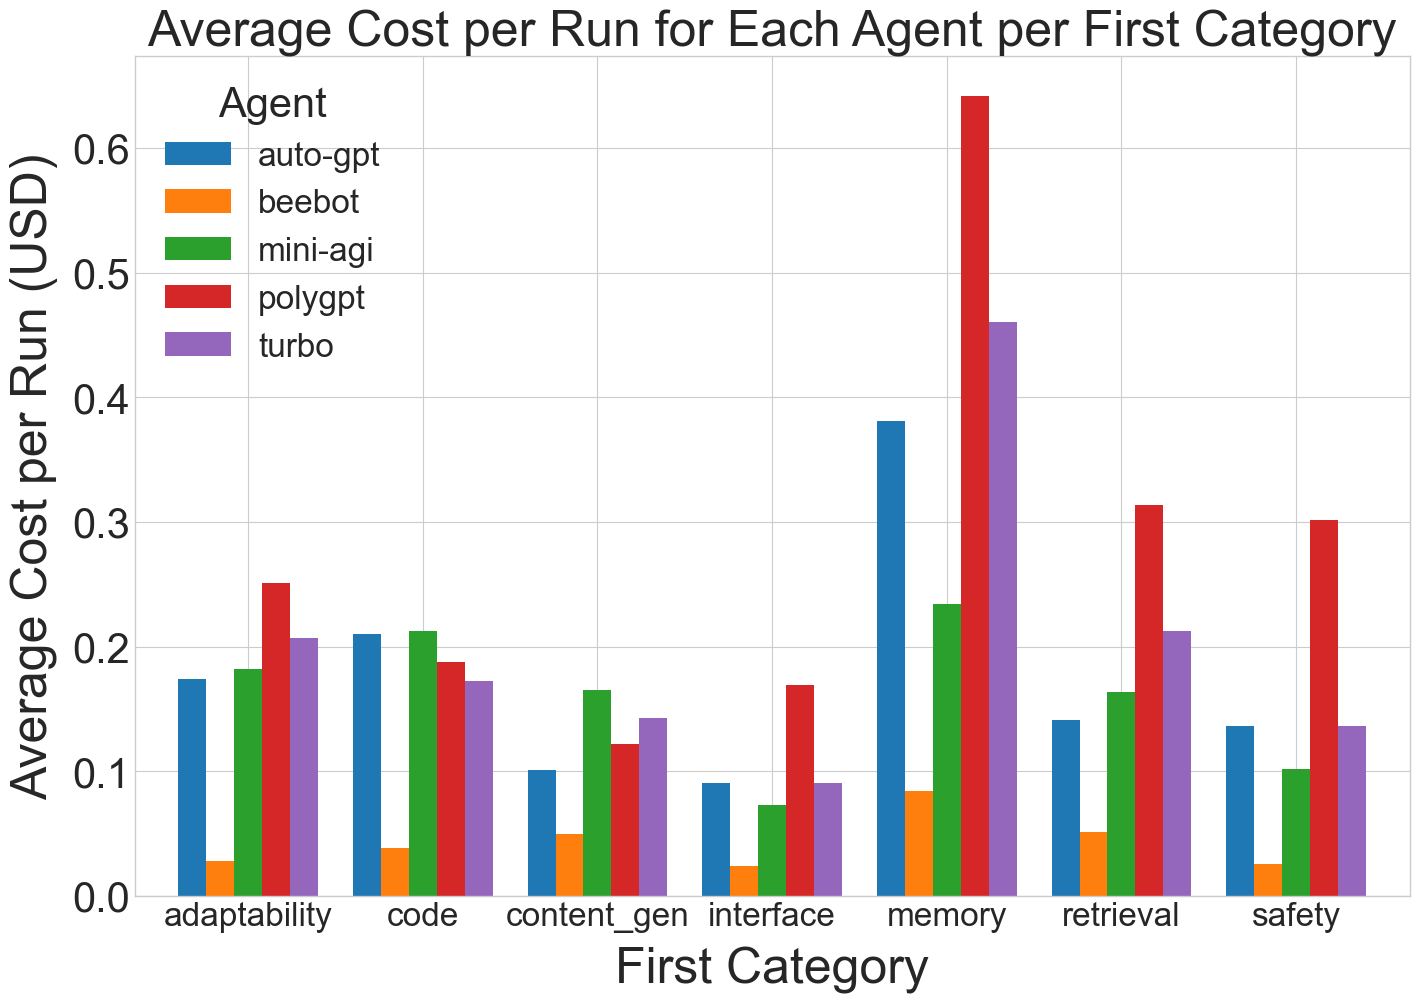

In [47]:
# Average Cost per Run for Each Agent per First Category

# Filter out agents to ignore
filtered_df = df[~df['agent'].isin(agents_to_ignore)]

# Filter out challenges to ignore
filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Convert 'categories' from a comma-separated string to a list
filtered_df['categories'] = filtered_df['categories'].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

# Take the first category and create a new column for it
filtered_df['first_category'] = filtered_df['categories'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Group by 'agent', 'benchmark_start_time', 'challenge', and 'first_category' to get the total cost for each run
grouped_runs = filtered_df.groupby(['agent', 'benchmark_start_time', 'challenge', 'first_category'])['costUSD'].sum().reset_index()

# Group by 'agent' and 'first_category' to get the average cost per run
grouped_avg_cost = grouped_runs.groupby(['agent', 'first_category'])['costUSD'].mean().reset_index()

# Create a pivot table for better visualization
pivot_avg_cost = pd.pivot_table(grouped_avg_cost, values='costUSD', index='first_category', columns='agent')

# Plotting
ax = pivot_avg_cost.plot(kind='bar', figsize=(15, 12), fontsize=30, width=0.8)

# Set the size of the plot elements
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 36

# Set labels and title
ax.set_xlabel('First Category', labelpad=10)
ax.set_ylabel('Average Cost per Run (USD)', labelpad=10)
ax.set_title('Average Cost per Run for Each Agent per First Category')

# Set legend properties
ax.legend(title='Agent', fontsize='24', title_fontsize='30', loc='upper left')

# Set the rotation of the x-axis tick labels
ax.set_xticklabels(pivot_avg_cost.index, rotation=0, fontsize=24)

# Adjusting the space
plt.subplots_adjust(top=0.85, bottom=0.15, left=0.1, right=0.95)

plt.show()

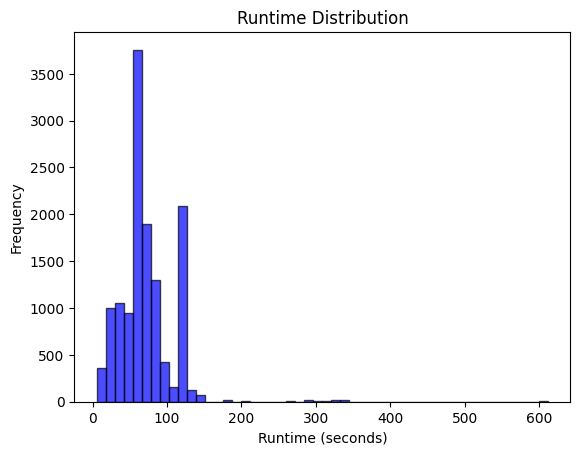

In [70]:
# Runtime Distribution

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out agents and challenges
filtered_df = df[~df['agent'].isin(agents_to_ignore)]
filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Convert 'categories' to a list and take the first category
filtered_df['categories'] = filtered_df['categories'].apply(lambda x: x.split(", ") if isinstance(x, str) else x)
filtered_df['first_category'] = filtered_df['categories'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Convert 'run_time' to float; assuming it's a string like "60.018 seconds"
filtered_df['run_time_float'] = filtered_df['run_time'].apply(lambda x: float(x.split(" ")[0]) if isinstance(x, str) else x)

# Create histogram
plt.hist(filtered_df['run_time_float'].dropna(), bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Runtime Distribution')
plt.xlabel('Runtime (seconds)')
plt.ylabel('Frequency')
plt.show()

Data types for 'agent': [<class 'str'>]
Number of duplicate 'agent' entries: 18493


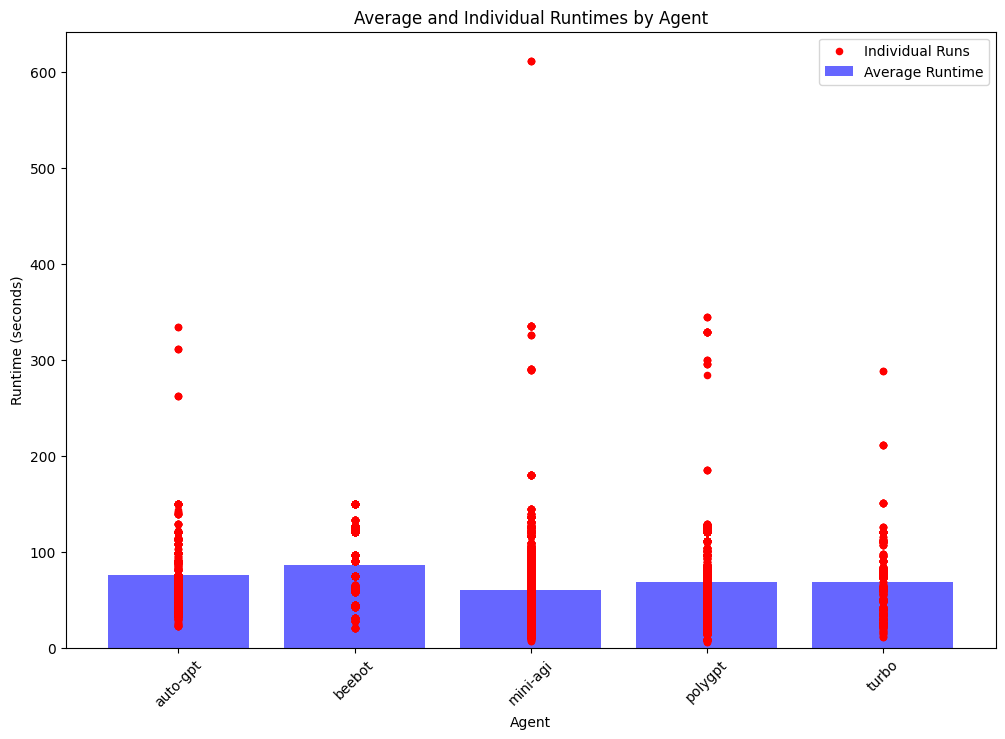

In [105]:
# Average and Individual Runtimes by Agent

filtered_df = df.copy()

if agents_to_ignore:
    filtered_df = filtered_df[~filtered_df['agent'].isin(agents_to_ignore)]

if challenges_to_ignore:
    filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Debugging Step 1: Check data types
print("Data types for 'agent':", filtered_df['agent'].apply(type).unique())

# Debugging Step 2: Drop NaNs
filtered_df = filtered_df.dropna(subset=['agent'])

# Debugging Step 3: Explicit Type Conversion
filtered_df['agent'] = filtered_df['agent'].astype(str)

filtered_df['run_time_float'] = filtered_df['run_time'].apply(lambda x: float(x.split(" ")[0]) if isinstance(x, str) else x)

# Calculate the average run time for each agent
avg_run_time = filtered_df.groupby('agent')['run_time_float'].mean()

# Debugging Step 4: Check for Duplicates
print("Number of duplicate 'agent' entries:", filtered_df['agent'].duplicated().sum())

# Continue with your plotting
plt.figure(figsize=(12, 8))
bars = plt.bar(avg_run_time.index, avg_run_time, color='blue', alpha=0.6, label='Average Runtime')

for i, agent in enumerate(avg_run_time.index):
    agent_data = filtered_df['run_time_float'][filtered_df['agent'] == agent]
    plt.scatter([i]*len(agent_data), agent_data, color='red', s=20, zorder=2, label='Individual Runs' if i == 0 else "")

plt.title('Average and Individual Runtimes by Agent')
plt.xlabel('Agent')
plt.ylabel('Runtime (seconds)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

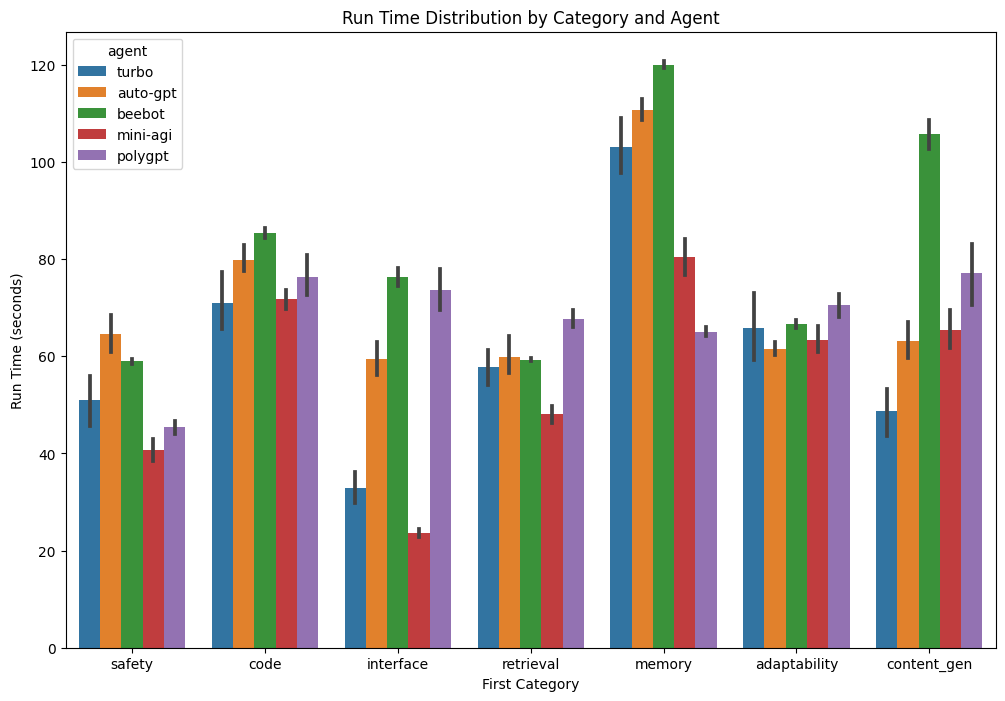

In [106]:
# Run Time Distribution by Category and Agent

# Filter out agents to ignore
filtered_df = df[~df['agent'].isin(agents_to_ignore)]

# Filter out challenges to ignore
filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Convert 'categories' from a comma-separated string to a list
filtered_df['categories'] = filtered_df['categories'].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

# Take the first category and create a new column for it
filtered_df['first_category'] = filtered_df['categories'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Convert 'run_time' to float
filtered_df['run_time'] = filtered_df['run_time'].str.replace(' seconds', '').astype(float)

# Create the plot
plt.figure(figsize=(12, 8))
sns.barplot(x='first_category', y='run_time', hue='agent', data=filtered_df)
plt.title('Run Time Distribution by Category and Agent')
plt.xlabel('First Category')
plt.ylabel('Run Time (seconds)')
plt.show()

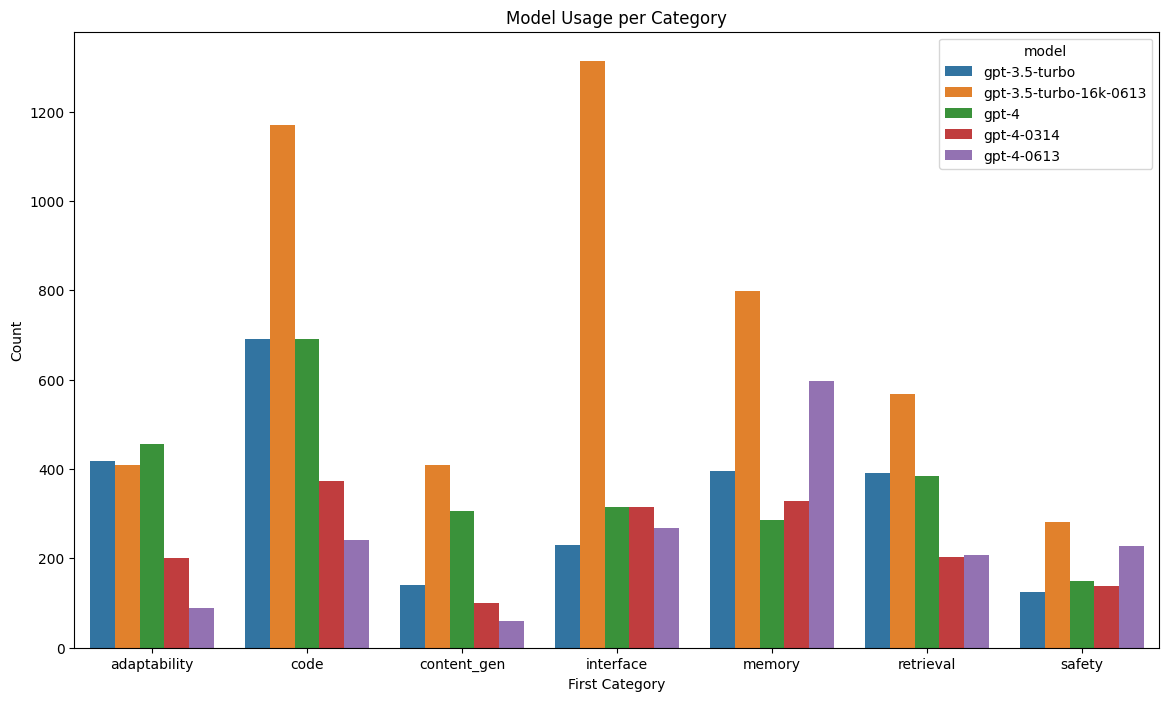

In [108]:
# Model Usage per Category

# Filter out agents to ignore
filtered_df = df[~df['agent'].isin(agents_to_ignore)]

# Filter out challenges to ignore
filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Convert 'categories' from a comma-separated string to a list
filtered_df['categories'] = filtered_df['categories'].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

# Take the first category and create a new column for it
filtered_df['first_category'] = filtered_df['categories'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Count the model usages for each category
model_count_df = filtered_df.groupby(['first_category', 'model']).size().reset_index(name='count')

# Create the plot
plt.figure(figsize=(14, 8))
sns.barplot(x='first_category', y='count', hue='model', data=model_count_df)
plt.title('Model Usage per Category')
plt.xlabel('First Category')
plt.ylabel('Count')
plt.show()

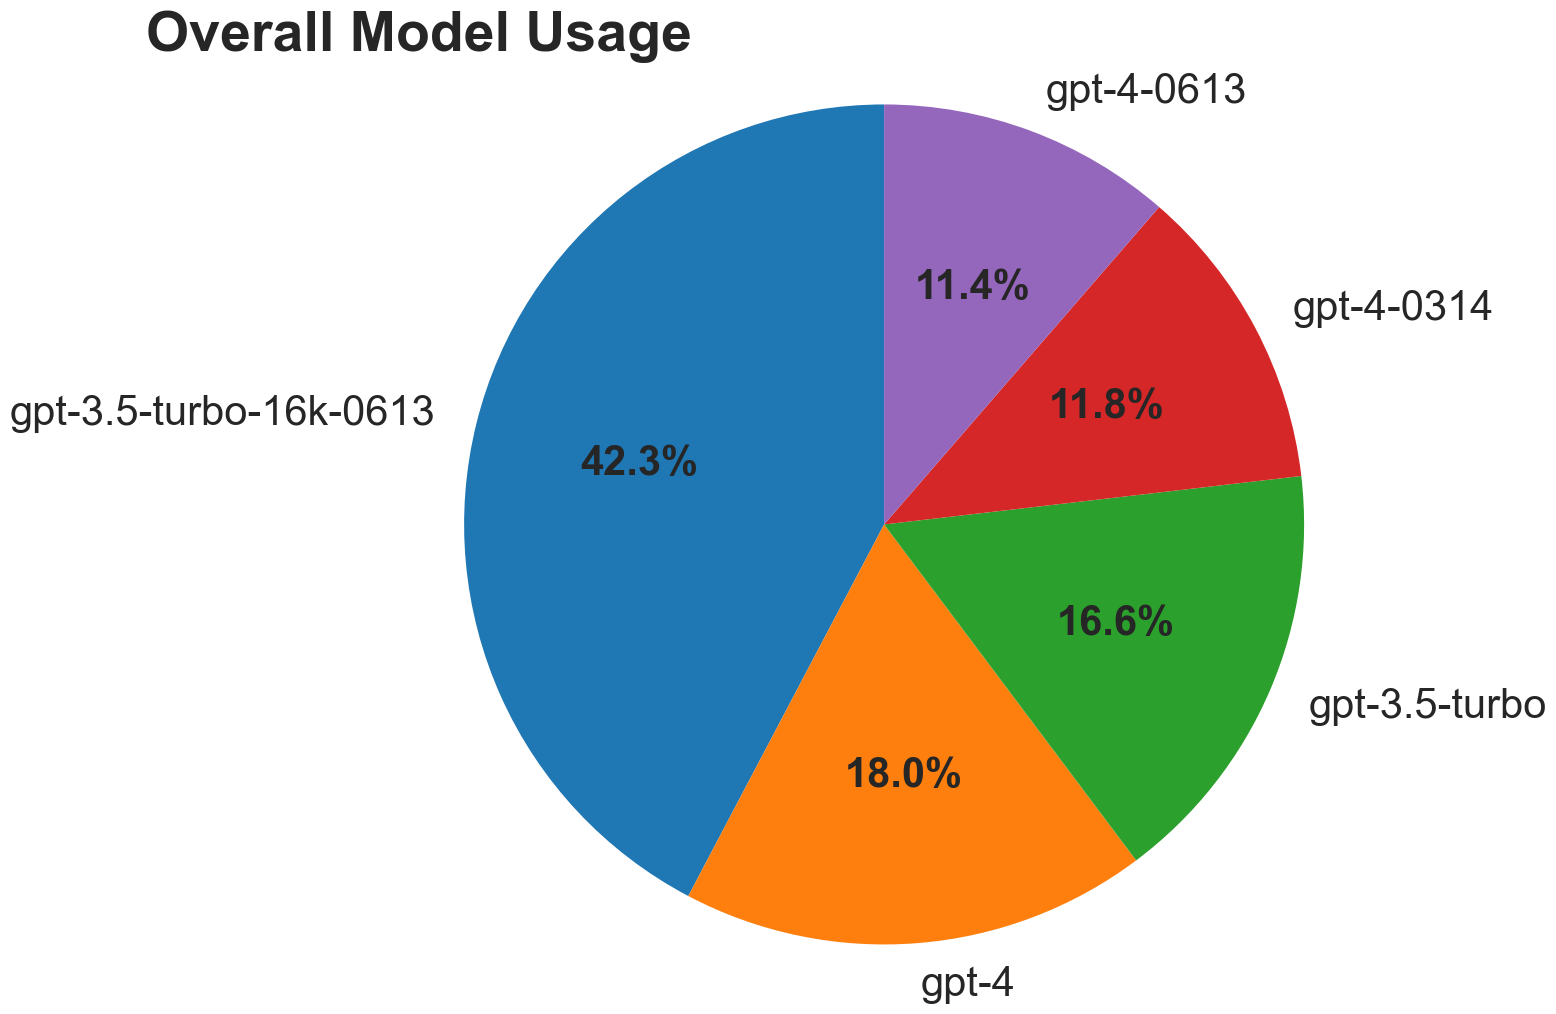

In [34]:
# Overall Model Usage

# Filter out agents to ignore
filtered_df = df[~df['agent'].isin(agents_to_ignore)]

# Filter out challenges to ignore
filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

# Convert 'categories' from a comma-separated string to a list
filtered_df['categories'] = filtered_df['categories'].apply(lambda x: x.split(", ") if isinstance(x, str) else x)

# Count the model usages
model_count = filtered_df['model'].value_counts()

# Create the pie chart
fig, ax = plt.subplots(figsize=(15, 12))

# Set the size of the plot elements
plt.rcParams['axes.titlesize'] = 40

# Count the model usages
model_count = filtered_df['model'].value_counts()

# Create the pie chart
wedges, texts, autotexts = ax.pie(model_count, labels=model_count.index, autopct='%1.1f%%', startangle=90, textprops=dict(size=30))

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Set title
title = ax.set_title('Overall Model Usage', weight="bold")
title.set_position([0.1, 0.5])  

# Improve legend
plt.setp(autotexts, size=30, weight="bold")

plt.show()

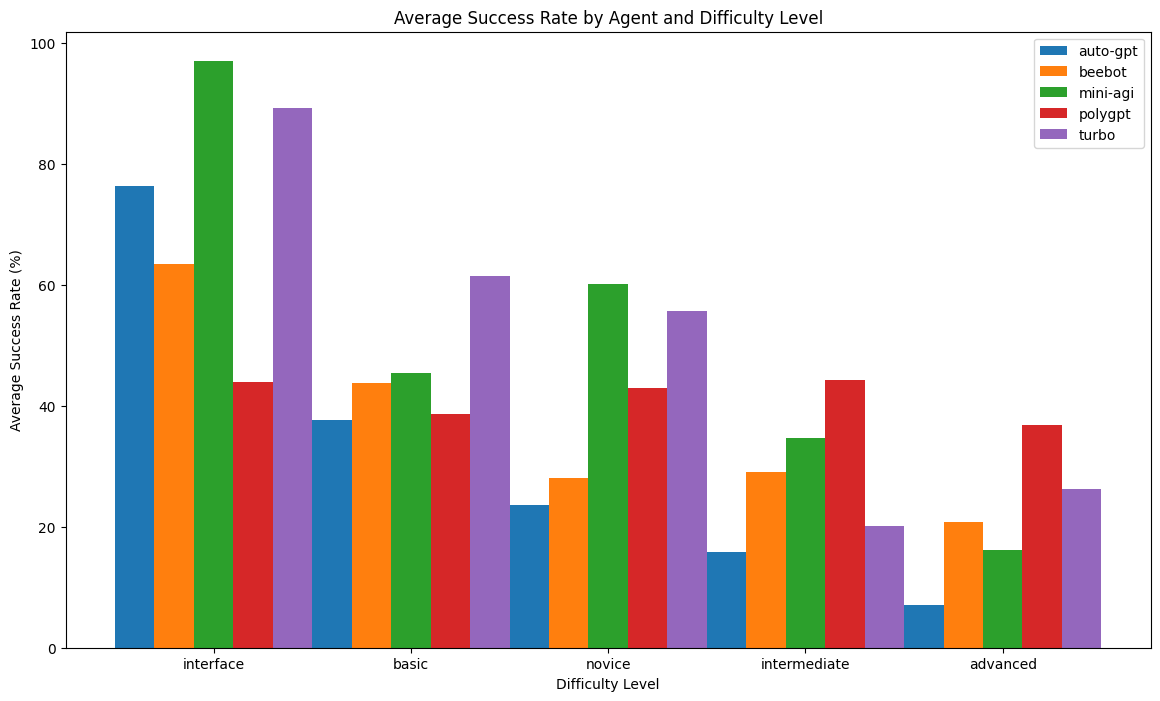

In [ ]:
# Average Success Rate by Agent and Difficulty Level

filtered_df = df[~df['agent'].isin(agents_to_ignore)]
filtered_df = filtered_df[~filtered_df['challenge'].isin(challenges_to_ignore)]

filtered_df = filtered_df[filtered_df['difficulty'] != 'No successful tests']

grouped_df = filtered_df.groupby(['agent', 'difficulty'])['success_%'].mean().reset_index()

plt.figure(figsize=(14, 8))

# Define ordered difficulties
ordered_difficulties = ['interface', 'basic', 'novice', 'intermediate', 'advanced']

# List unique agents
unique_agents = grouped_df['agent'].unique()

# Loop over each agent to create its own set of bars in the chart
for i, agent in enumerate(unique_agents):
    agent_data = grouped_df[grouped_df['agent'] == agent]
    
    # Create an empty list to hold success rates in the order of `ordered_difficulties`
    ordered_success_rates = []
    for difficulty in ordered_difficulties:
        success_rate = agent_data[agent_data['difficulty'] == difficulty]['success_%']
        ordered_success_rates.append(success_rate.iloc[0] if not success_rate.empty else 0)
        
    plt.bar([x + 0.2*i for x in range(len(ordered_difficulties))],
            ordered_success_rates,
            width=0.2,
            label=agent)

# Label the x-axis with the ordered difficulties
plt.xticks([x + 0.1*(len(unique_agents)-1) for x in range(len(ordered_difficulties))], ordered_difficulties)

plt.xlabel('Difficulty Level')
plt.ylabel('Average Success Rate (%)')
plt.title('Average Success Rate by Agent and Difficulty Level')
plt.legend()

plt.show()